In [28]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/germany/'

#results_dir = 'exp1_results/'
#graph_xlim = (-3, 12)
#graph_ylim = (0, 10)
#gridsize = 200

#results_dir = 'exp2_results/'
#graph_xlim = (-3, 12)
#graph_ylim = (-10, 13)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (-2, 10)
#graph_ylim = (-1, 12)
#gridsize = 200

#results_dir = 'exp4_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (-10, 14)
#gridsize = 1000

#results_dir = 'exp5_results/'
#graph_xlim = (-3, 12)
#graph_ylim = (-1, 12)
#gridsize = 200

#results_dir = 'exp6_results/'
#graph_xlim = (-3, 11)
#graph_ylim = (-10, 12)
#gridsize = 1000

#results_dir = 'exp7_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (-2, 12)
#gridsize = 200

#results_dir = 'exp8_results/'
#graph_xlim = (-6, 16)
#graph_ylim = (-10, 17)
#gridsize = 1000

results_dir = 'exp9_results/'
graph_xlim = (-10, 11)
graph_ylim = (-2, 12)
gridsize = 200

# 
#dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

# exp7, exp8, exp9 
dimension_names_to_visualize = ['Opposes multiculturalism', 'People over elites (salience)']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# Germany
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'Germany_reference_group.csv'
group_attitudes_file = data_dir + 'Germany_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'Germany'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

graph_file = data_dir + results_dir + 'germany_extended.pdf'

['ches2019_multiculturalism', 'ches2019_antielite_salience']


In [29]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_multiculturalism,ches2019_antielite_salience,ches2019_immigrate_dissent,ches2019_religious_principles
0,0,-4.200830,2.055379,-1.052941,-7.693915
1,1,4.516396,6.593390,-0.541336,-1.272221
2,2,-4.242274,1.285182,-1.614130,-7.614846
3,3,-3.406535,1.023294,-1.253835,-6.606129
4,4,3.191359,0.941560,2.743406,1.885071


In [30]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(522, 5)
(522, 7)
(521, 8)
(521, 13)


,entity,ches2019_multiculturalism,ches2019_antielite_salience,ches2019_immigrate_dissent,ches2019_religious_principles,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay
0,0,-0.990504,1.040872,0.004385,-4.292522,0,0,CDU/CSU,green,0.2,0.0,0.1,0.1
1,1,7.062201,1.147004,4.966265,6.211809,1,0,CDU/CSU,green,0.2,0.0,0.1,0.1
2,2,7.590936,1.177445,5.018542,6.432438,2,0,CDU/CSU,green,0.2,0.0,0.1,0.1
3,3,6.433410,1.063191,4.440778,5.179630,3,0,CDU/CSU,green,0.2,0.0,0.1,0.1
4,4,5.611204,0.771878,3.936079,4.314841,4,0,CDU/CSU,green,0.2,0.0,0.1,0.1


In [31]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,AfD,54
1,Alliance 90/The Greens,71
2,CDU,20
3,CDU/CSU,122
4,CSU,8
5,FDP,50
6,SPD,125
7,The Left Party,71


In [32]:
group_names_df.head(20)

,k,party
0,0,CDU/CSU
1,1,SPD
2,2,The Left Party
3,3,Alliance 90/The Greens
5,5,CDU
6,6,CSU
7,7,AfD
8,8,FDP


In [33]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(9, 3)
(8, 8)


,ches2019_multiculturalism,ches2019_antielite_salience,party,color,dim_x,dim_y,dim_ax,dim_ay
0,6.894843,1.145506,CDU/CSU,green,0.2,0.0,0.1,0.1
1,3.894374,1.354279,SPD,blue,0.2,-0.1,0.1,0.1
2,2.749353,4.475198,The Left Party,pink,0.1,0.1,0.1,0.1
3,2.220076,1.607687,Alliance 90/The Greens,yellow,0.3,-0.1,0.1,0.1
4,6.978114,1.163667,CDU,#CD6090,0.2,-0.1,0.1,0.1
5,8.683301,1.032634,CSU,#33A1C9,0.1,0.2,0.1,0.1
6,9.950681,9.692525,AfD,#8968CD,0.0,0.2,0.1,0.1
7,5.808670,1.128503,FDP,red,0.2,0.1,0.1,0.1


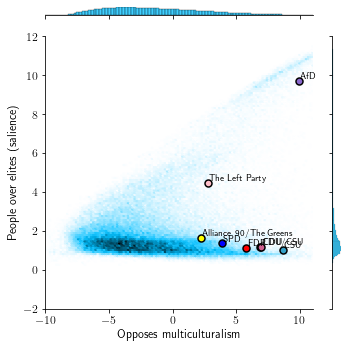

In [35]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, # ) #,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.savefig(graph_file)

plt.show()